#  "Strategic Analysis and Predictive Modeling: Enabling a Chinese Automaker's Success in the US Market"

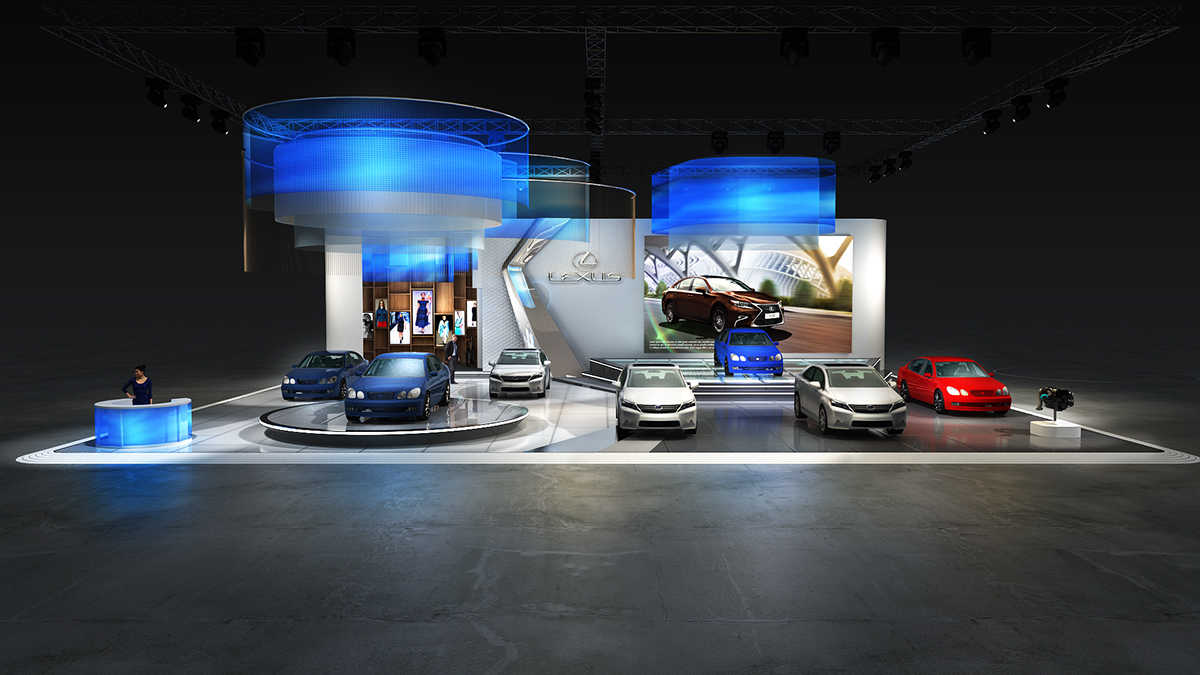

In [11]:
from IPython.display import Image, display
display(Image(filename='car 3e9d9d51611011.58f47d54bdbee.jpg'))


## Table of Contents :
### 1.Introduction
### 2.Goal Of the Project
### 3.Data Story
### 4.Data Preprocessing

### 1. Project Introduction:
      As part of this module-end project, the focus is on aiding a Chinese automobile company in its strategic expansion into the US market by analyzing factors influencing car pricing. In collaboration with an automobile consulting firm, the company seeks to understand the dynamics of the American car market, which significantly differ from the Chinese market. Using a comprehensive dataset of various car types in the US, the project aims to identify the significant variables that impact car prices and develop regression models to predict pricing effectively.
By implementing five regression algorithms—Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor—the project will provide insights into pricing dynamics, enabling the management to optimize design and business strategies for competitive advantage.


### 2.Goal of the Project
The primary aim of this project is to help a Chinese automobile company understand the pricing dynamics of the American car market as they enter this new territory. By analyzing a dataset of cars and identifying the significant variables influencing prices, the project seeks to develop predictive models. These models will assist the company in making informed decisions about car design, manufacturing strategies, and business practices to compete effectively with established US and European automobile brands.
Ultimately, the insights gained from this project will enable the company to strategize better and optimize their market positioning for a successful expansion into the US market.

### 3.Data Story/Source
About dataset

Source of the data is from
link :https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link



### Dataset Description
The dataset contains 205 rows and 26 columns, indicating there are 205 individual car entries (or observations) with 26 features (or attributes). These features include a mix of categorical and numerical variables, such as car characteristics, performance metrics, and technical specifications. The final column, "price," is the target variable to be predicted, while the other columns act as independent variables.
Key aspects:
         The dataset contains 205 rows and 26 columns, indicating there are 205 individual car entries (or observations) with 26 features (or attributes). These features include a mix of categorical and numerical variables, such as car characteristics, performance metrics, and technical specifications. The final column, "price," is the target variable to be predicted, while the other columns act as independent variables.

## Data Preprocessing

### 1.Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import warnings
warnings.filterwarnings("ignore")

### 2. Load the dataset

In [30]:

# Google Drive link
url = 'https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'

# Send a request to the URL
response = requests.get(url)

# Save the content to a local file (e.g., 'dataset.csv')
with open('dataset.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset
data = pd.read_csv('dataset.csv')



In [32]:
# Display the first few rows of the dataset
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
data.shape

(205, 26)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [42]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
# Check unique values for 'aspiration'
print("Unique values in 'aspiration':", data['aspiration'].unique())

# Check unique values for 'fueltype'
print("Unique values in 'fueltype':", data['fueltype'].unique())
# Check unique values for 'fuelsystem'
print("Unique values in 'fuelsystem':", data['fuelsystem'].unique())



Unique values in 'aspiration': ['std' 'turbo']
Unique values in 'fueltype': ['gas' 'diesel']
Unique values in 'fuelsystem': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [46]:
# Dropping the unnecessary columns
data.drop(['car_ID','CarName'],axis=1,inplace=True)

In [48]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 4.Handle Missing Data

In [55]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values. As no null values, dropna() not used.

### 5.Handle Duplicates

In [61]:
data.duplicated().sum()

1

In [63]:
data.drop_duplicates(inplace=True)

### 6.Handle outliers

In [70]:
print(data.dtypes)


symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [72]:
# Label Encoding for binary categorical columns
binary_columns = ['fueltype', 'aspiration']
data['fueltype'] = data['fueltype'].map({'gas': 0, 'diesel': 1})
data['aspiration'] = data['aspiration'].map({'std': 0, 'turbo': 1})

# One-Hot Encoding for multi-category columns
multi_category_columns = ['carbody', 'drivewheel', 'enginetype']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=multi_category_columns, drop_first=True)

# Display the first few rows of the updated dataset
print(data.head())

# Check the data types to confirm encoding
print(data.dtypes)


   symboling  fueltype  aspiration doornumber enginelocation  wheelbase  \
0          3         0           0        two          front       88.6   
1          3         0           0        two          front       88.6   
2          1         0           0        two          front       94.5   
3          2         0           0       four          front       99.8   
4          2         0           0       four          front       99.4   

   carlength  carwidth  carheight  curbweight  ... carbody_sedan  \
0      168.8      64.1       48.8        2548  ...         False   
1      168.8      64.1       48.8        2548  ...         False   
2      171.2      65.5       52.4        2823  ...         False   
3      176.6      66.2       54.3        2337  ...          True   
4      176.6      66.4       54.3        2824  ...          True   

   carbody_wagon drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  \
0          False          False            True             False   
1 